# Alexnet Change in Curvature Plots
This notebook generates change in curvature plots for Alexnet and demonstrates how to use helper functions in utils.py

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import os
from PIL import Image
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from utils import *

In [2]:
video_types = ['natural', 'contrast','artificial']
all_videos = {}
for vid_type in video_types:
    print(vid_type)
    if vid_type == 'contrast':
        video_names = [ 'water-contrast0.5', 'prairieTer-contrastLog0.1', 'boats_contrastCocktail', 'bees_contrastCocktail', 'walking_contrastCocktail', 'egomotion_contrastCocktail', 'smile-contrastLog0.1', 'walking-contrast0.5', 'bees-contrast0.5', 'walking-contrastLog0.1' ]
    else:
        video_names = [ 'water', 'prairieTer', 'ice3', 'dogville', 'egomotion', 'walking', 'smile', 'bees', 'leaves-wind', 'carnegie-dam', 'chironomus' ]
    video_group = []
    for video in video_names:
        video_dir ='../../Perceptual-Straightening-models/stimuli/gamma1/' + video
        if vid_type == 'artificial':
            video_group.append(load_henaff_video(video_dir,natural=False,rgb=True))
        else:
            video_group.append(load_henaff_video(video_dir,rgb=True))
            
    all_videos[vid_type] = video_group[:]

natural
contrast
artificial


In [4]:
# model
name = 'alexnet'
model = models.__dict__[name](pretrained=True)

model.eval()

# get blocks
pool1 = torch.nn.Sequential(*list(model.features.children())[:3])
pool2 = torch.nn.Sequential(*list(model.features.children())[:6])
pool3 = torch.nn.Sequential(*list(model.features.children())[:])

pool1.eval()
pool2.eval()
pool3.eval()

model_blocks = [pool1, pool2, pool3]

In [5]:
# curvature
for vid_type in all_videos.keys():
    print(vid_type)
    videos = all_videos[vid_type]
    curves_full, curves = collect_model_curves(model_blocks, videos)
    curves_full_pca, curves_pca = collect_model_curves(model_blocks, videos,pca=True)
    all_videos[vid_type] = [(curves_full, curves), (curves_full_pca, curves_pca)]

natural
contrast
artificial


In [6]:
# global curve
final_values = {}
for vid_type in all_videos.keys():
    curves_full, curves = all_videos[vid_type][0]
    curves_full_pca, curves_pca = all_videos[vid_type][1]
    final_curve = get_global_curve(curves_full)
    final_curve_change = get_global_curve(curves)

    final_curve_pca = get_global_curve(curves_full_pca)
    final_curve_change_pca = get_global_curve(curves_pca)
    
    final_values[vid_type] = [(final_curve, final_curve_change), 
                              (final_curve_pca, final_curve_change_pca)]

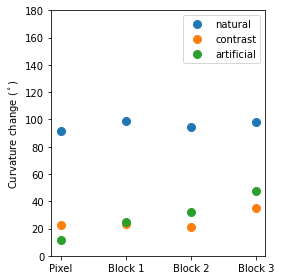

In [8]:
# plot curvature no pca
xlabels = ['Pixel', 'Block 1', 'Block 2', 'Block 3']
plt.figure(figsize=(4,4))
for vid_type in final_values.keys():
    plt.plot(xlabels, final_values[vid_type][0][0], 'o',markersize=8,label=vid_type)
plt.legend()
plt.ylim([0, 180])
plt.ylabel('Curvature change ($^\circ$)')
# plt.title('Curvature Across Alexnet Blocks', fontsize=12)
plt.tight_layout()
plt.savefig(f'{name}_curve.png',dpi=300)

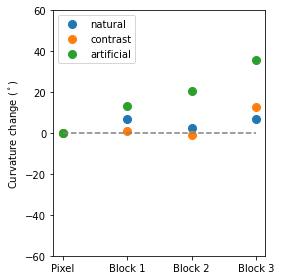

In [9]:
# plot change in curvature no pca
xlabels = ['Pixel', 'Block 1', 'Block 2', 'Block 3']
plt.figure(figsize=(4,4))
for vid_type in final_values.keys():
    plt.plot(xlabels, final_values[vid_type][0][1], 'o',markersize=8,label=vid_type)
plt.legend()
plt.plot([xlabels[0], xlabels[-1]],[0,0], '--', color='gray')
plt.ylim([-60, 60])
plt.ylabel('Curvature change ($^\circ$)')
# plt.title('Change in Curvature Across Alexnet Blocks', fontsize=12)
plt.tight_layout()
plt.savefig(f'{name}_curve_change.png',dpi=300)

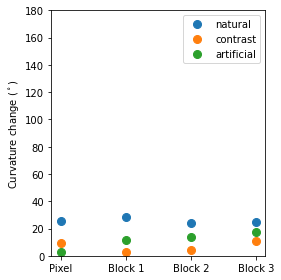

In [10]:
# plot curvature with pca
xlabels = ['Pixel', 'Block 1', 'Block 2', 'Block 3']
plt.figure(figsize=(4,4))
for vid_type in final_values.keys():
    plt.plot(xlabels, final_values[vid_type][1][0], 'o',markersize=8,label=vid_type)
plt.legend()
plt.ylim([0, 180])
plt.ylabel('Curvature change ($^\circ$)')
# plt.title('Curvature Across Alexnet Blocks (with PCA)', fontsize=12)
plt.tight_layout()
plt.savefig(f'{name}_curve_pca.png',dpi=300)

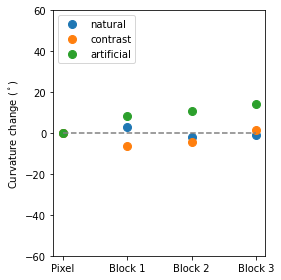

In [11]:
# plot change in curvature pca
xlabels = ['Pixel', 'Block 1', 'Block 2', 'Block 3']
plt.figure(figsize=(4,4))
for vid_type in final_values.keys():
    plt.plot(xlabels, final_values[vid_type][1][1], 'o',markersize=8,label=vid_type)
plt.legend(loc='upper left')
plt.plot([xlabels[0], xlabels[-1]],[0,0], '--', color='gray')
plt.ylim([-60, 60])
plt.ylabel('Curvature change ($^\circ$)')
# plt.title('Change in Curvature Across Alexnet Blocks (with PCA)', fontsize=12)
plt.tight_layout()
plt.savefig(f'{name}_curve_change_pca.png',dpi=300)